In [1]:
%matplotlib inline
import cartopy.feature
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import xarray as xr
import xesmf as xe
import glac_mw.plotting as plotting
import glac_mw.glac1d_toolbox as tb
import datetime

# Demonstration saving algorithm

**Objective** : Ploting tools to visualise glac_mw discharge masks.
- Plot discharge time series.
- Scater plots of routed discharge files.

In [2]:
ds_lsm = xr.open_dataset('/nfs/annie/earpal/database/experiments/temev/inidata/temev.qrparm.omask.nc')

lon_lsm, lat_lsm = ds_lsm.longitude.values, ds_lsm.latitude.values
lon_lsm_b, lat_lsm_b = tb.create_coordinate_edges(lon_lsm), tb.create_coordinate_edges(lat_lsm)
lsm = ds_lsm.lsm.values

ds_lsm

<xarray.Dataset>
Dimensions:     (latitude: 144, longitude: 288)
Coordinates:
  * longitude   (longitude) float32 0.0 1.25 2.5 3.75 ... 356.25 357.5 358.75
  * latitude    (latitude) float32 -89.375 -88.125 -86.875 ... 88.125 89.375
Data variables:
    lsm         (latitude, longitude) float32 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0
    depthlevel  (latitude, longitude) float32 ...
    depthdepth  (latitude, longitude) float32 ...
Attributes:
    title:    Produced using writenc6 program by PJV

Text(0.5, 1.0, 'Land sea mask at 21 kya')

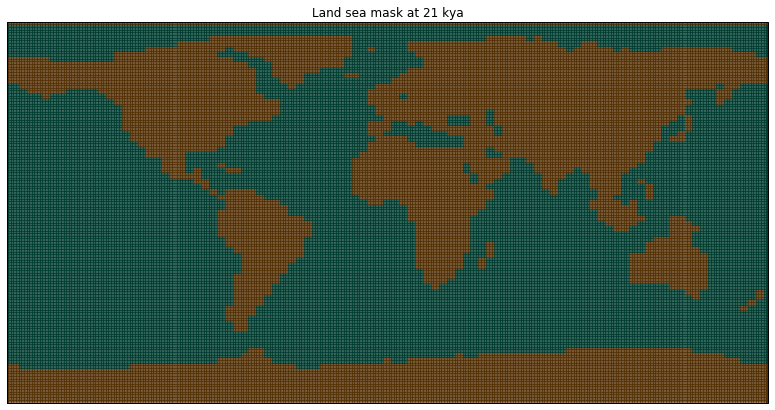

In [3]:
projection_map = ccrs.PlateCarree()
figMap,axMap = plt.subplots(nrows=1, ncols=1, subplot_kw={'projection':projection_map}, figsize=(14,7))

cmap = axMap.pcolormesh(lon_lsm_b, lat_lsm_b, lsm, transform=ccrs.PlateCarree(), cmap="BrBG_r", alpha=0.8)
axMap.set_global()
axMap.set_title("Land sea mask at 21 kya")

## Scatter plots

In [4]:
ds = xr.open_dataset("/nfs/annie/eeymr/work/outputs/proj_glac_mw/glac.-26_-25.8_100.diff/temev.discharge.glac_mw.nc", decode_times=False)
routed_mw = ds.discharge.values
ds

<xarray.Dataset>
Dimensions:    (latitude: 144, longitude: 288, t: 3)
Coordinates:
  * t          (t) float64 -2.6e+04 -2.59e+04 -2.58e+04
  * latitude   (latitude) float32 -89.375 -88.125 -86.875 ... 88.125 89.375
  * longitude  (longitude) float32 0.0 1.25 2.5 3.75 ... 356.25 357.5 358.75
Data variables:
    discharge  (t, latitude, longitude) float64 nan nan nan nan ... nan nan nan
Attributes:
    title:        Meltwater discharge for transient GLAC1D last delgaciation ...
    start_year:   -26
    end_year:     -25.8
    step:         100
    mode:         routed
    mode_smooth:  diff
    lsm:          temev
    history:      Created 2020-05-27 by Yvan Romé

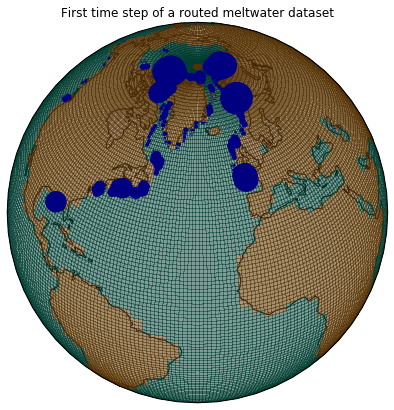

In [5]:
projection_map = ccrs.Orthographic(central_longitude=-30.0, central_latitude=40.0)

figMap,axMap = plt.subplots(nrows=1, ncols=1, subplot_kw={'projection':projection_map}, figsize=(7,7))

axMap.pcolormesh(lon_lsm_b, lat_lsm_b, lsm, transform=ccrs.PlateCarree(),cmap="BrBG_r", alpha=0.5)

x,y,s = plotting.scatter_mask(routed_mw[0])
axMap.scatter(lon_lsm[x], lat_lsm[y], transform=ccrs.PlateCarree(), s=s, color="navy")
axMap.set_global()
axMap.set_title("First time step of a routed meltwater dataset")
axMap.add_feature(cartopy.feature.LAND, zorder=0, edgecolor='black')

## Discharge time serie plot

__ Flux time serie algorithm
____ Computation time step : 0. Total flux : 0.08380879701042346
____ Computation time step : 1. Total flux : 0.08901463218482732
____ Computation time step : 2. Total flux : 0.08353814215086473
Saving at /nfs/annie/eeymr/work/outputs/proj_glac_mw/glac.-26_-25.8_100.diff_s/temev.discharge.glac_mw.fluxplot.png


/nfs/see-fs-01_users/eeymr/scripts/glac_mw/plotting.py:78: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figMap.show()


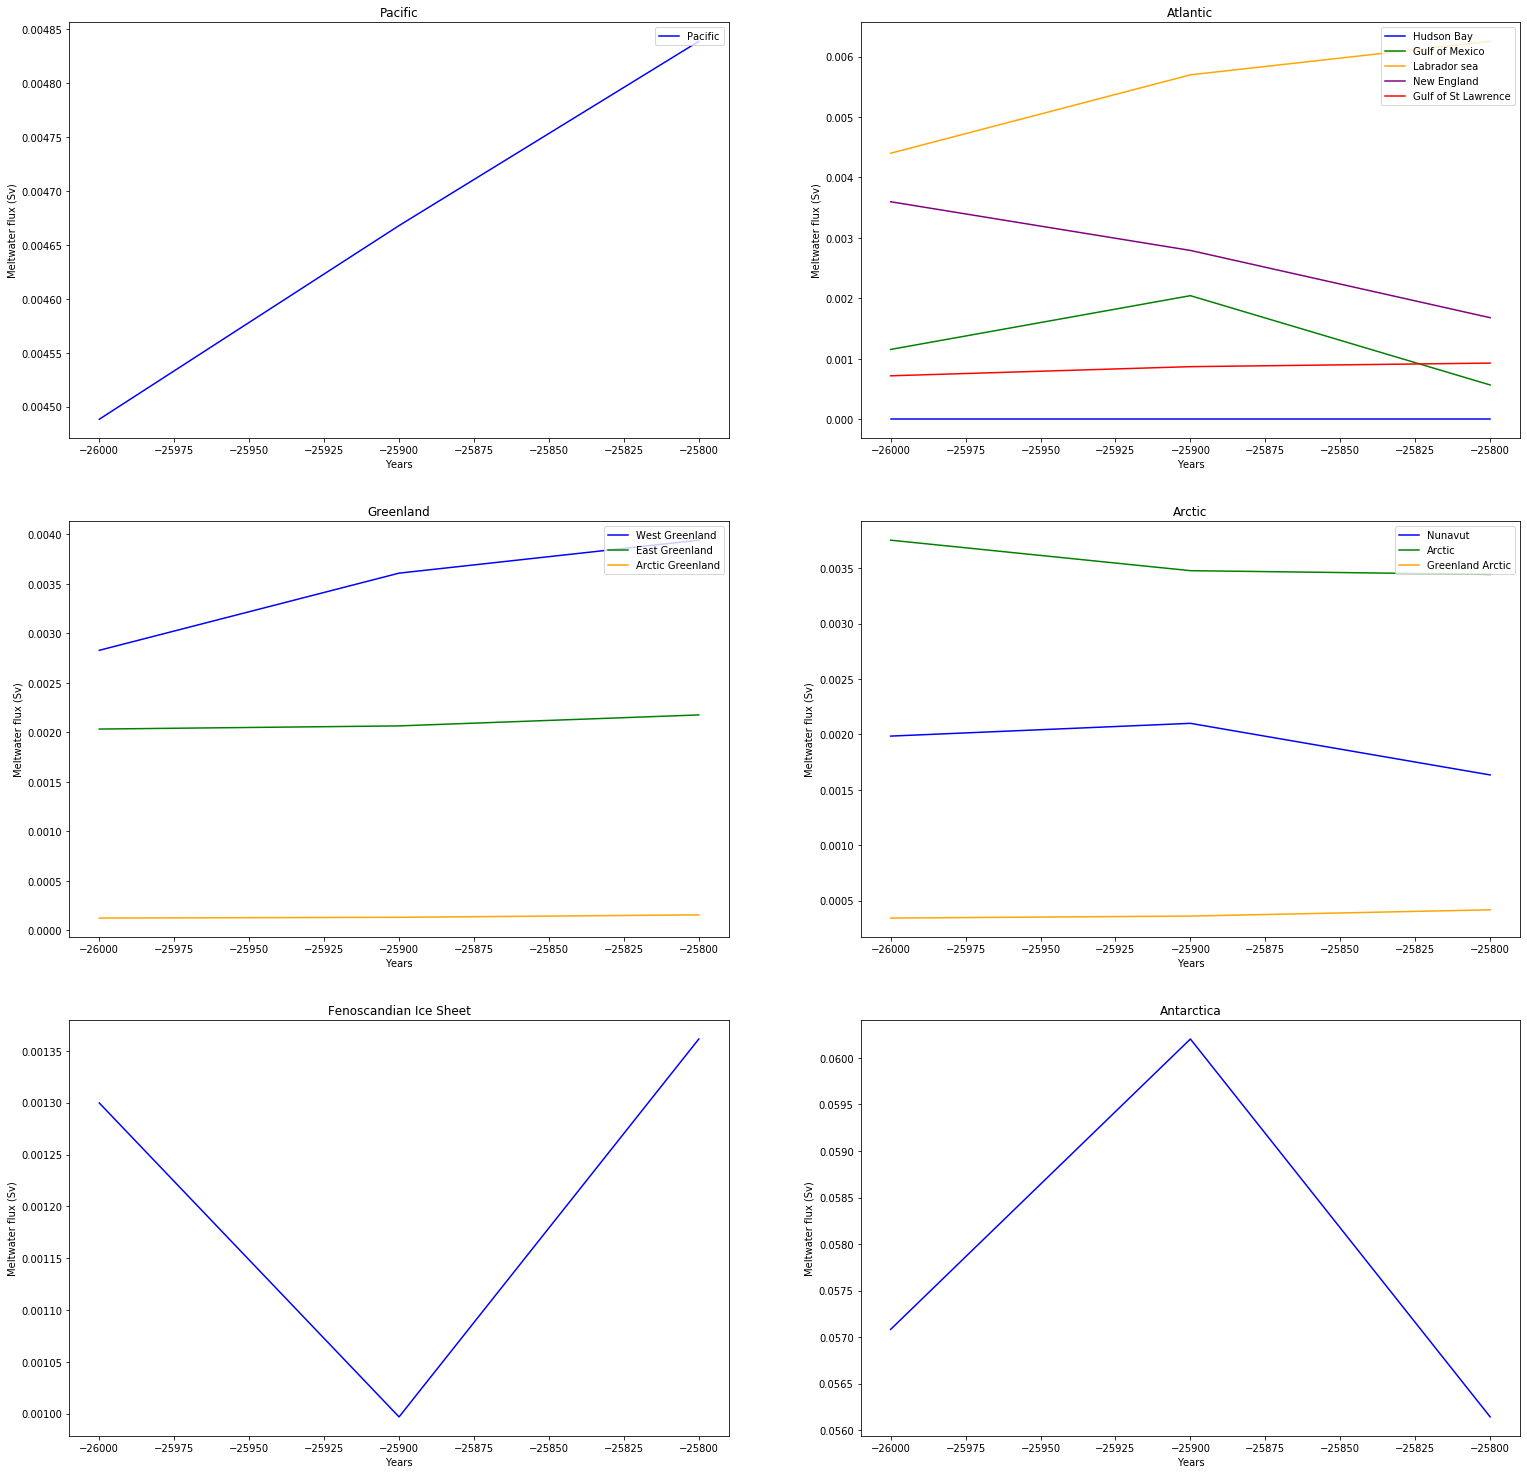

In [6]:
plotting.plot_discharge_ts("/nfs/annie/eeymr/work/outputs/proj_glac_mw/glac.-26_-25.8_100.diff_s/temev.discharge.glac_mw.nc", unit="kg/m2/s", out="plot")